# Graph SLAM Problem

$\min J(x_i) = x_0^T\Omega_0 x_0 + \sum_t e_t R_t^{-1} e_t  + \sum_t \sum_i \tilde{z}^i_t  Q_t^{-1} \tilde{z}^i_t + \$

$ e_t \equiv x_t - g(u_t, x_{t-1})$ prediction error at time t

$\tilde{z}^i_t \equiv z^i_t - h(x_t, m^i_t)$ measurement error

$\dot{p_x} = v_x$

$\dot{p_y} = v_y$

$x_t = \begin{bmatrix} p_x \\ p_y \end{bmatrix}$
$u_t = \begin{bmatrix} v_x \\ v_y \end{bmatrix}$

$x_t = x_{t-1} + \Delta_t u_t $

$g(u_t, x_t{-1}) = x_{t-1}  + \Delta_t u_t$

--> 161 z_factor=np.append(z,np.expand_dims(i*np.ones[len(z),1],axis=1))Landmarks are points. And our measurement is relative position.

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import casadi as ca
import slam2d
import SF2D
import time

runtime [s]:  11.791613101959229


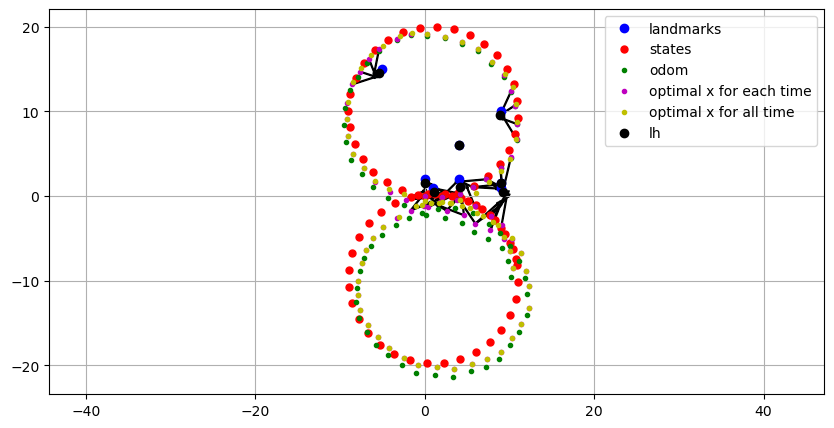

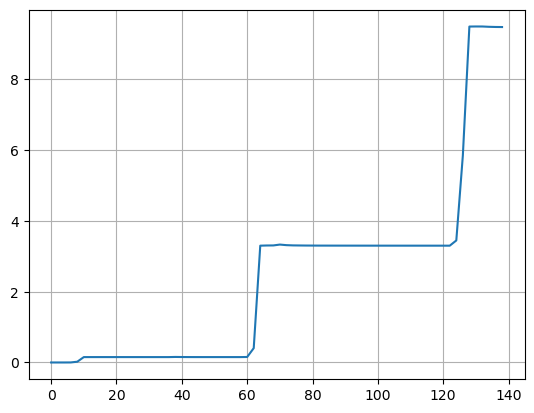

In [7]:
noise={
    'odom_std': 0.1,
    'bearing_std': 0,
    'range_std': 0.05,
    'odom_bx_bias': 0,
    'odom_by_bias': 0
}

plt.figure(figsize=(10, 5))

t0 = time.time()

sim = slam2d.simulate(noise=noise, plot=True, symf=True, tf=140);
#sf: true-symforce, false-casadi

tf =  time.time() - t0
print('runtime [s]: ', tf)

# print(sim['hist']['lh'])

plt.figure()
plt.plot(sim['hist']['t'], sim['hist']['J'][:])
plt.grid()

In [1]:
x=sim['hist']['xh']
lm=sim['hist']['lh'][-1]
odom=sim['hist']['odom'][:,0:2]
z = sim['hist']['z']
z = np.append(z,np.expand_dims(sim['hist']['assoc'],1),axis=1)
result = SF2D.optimize(x,lm,odom,z)
print(result.optimized_values['poses'][0])

NameError: name 'sim' is not defined

In [ ]:
print(sim['hist']['odom'])

In [24]:
x=sim['hist']['xh']
lm=sim['hist']['lh'][-1]
odom=sim['hist']['odom'][:,0:2]
z = sim['hist']['z']
z = np.append(z,np.expand_dims(sim['hist']['assoc'],1),axis=1)
result = SF2D.optimize(x,lm,odom,z)
print(result.optimized_values['poses'][0])

[2023-02-03 12:19:54.165] [info] LM<sym::Optimize> [iter    0] lambda: 1.000e+00, error prev/linear/new: 7.653/0.036/0.608, rel reduction: 0.92061
[2023-02-03 12:19:54.167] [info] LM<sym::Optimize> [iter    1] lambda: 2.500e-01, error prev/linear/new: 0.608/0.021/0.075, rel reduction: 0.87725
[2023-02-03 12:19:54.170] [info] LM<sym::Optimize> [iter    2] lambda: 6.250e-02, error prev/linear/new: 0.075/0.020/0.203, rel reduction: -1.72510
[2023-02-03 12:19:54.172] [info] LM<sym::Optimize> [iter    3] lambda: 2.500e-01, error prev/linear/new: 0.075/0.029/0.043, rel reduction: 0.42936
[2023-02-03 12:19:54.174] [info] LM<sym::Optimize> [iter    4] lambda: 6.250e-02, error prev/linear/new: 0.043/0.025/0.036, rel reduction: 0.15498
[2023-02-03 12:19:54.177] [info] LM<sym::Optimize> [iter    5] lambda: 1.562e-02, error prev/linear/new: 0.036/0.016/0.148, rel reduction: -3.11826
[2023-02-03 12:19:54.179] [info] LM<sym::Optimize> [iter    6] lambda: 6.250e-02, error prev/linear/new: 0.036/0.018

lh: [[-0.08189255  1.80059846]
 [ 4.          6.        ]
 [ 8.81681118  1.08733444]
 [ 3.9949868   1.84303296]
 [ 8.71127651  1.46738067]
 [ 9.11701185 10.08720751]
 [-4.55819378 15.21444597]]
xh: [[-4.44640174e-02 -1.48600923e-01]
 [ 2.00982703e+00 -2.52215488e-01]
 [ 3.92637349e+00  4.09891861e-01]
 [ 5.73136441e+00  1.15895708e+00]
 [ 7.35148100e+00  2.09814330e+00]
 [ 8.66055281e+00  3.58357955e+00]
 [ 1.01544808e+01  5.60281232e+00]
 [ 1.08423985e+01  7.45892127e+00]
 [ 1.11081964e+01  9.36621407e+00]
 [ 1.09008935e+01  1.13198330e+01]
 [ 1.03905640e+01  1.32857921e+01]
 [ 9.58971947e+00  1.49103654e+01]
 [ 8.02417474e+00  1.67051870e+01]
 [ 6.50756790e+00  1.85572655e+01]
 [ 4.84807796e+00  1.95380690e+01]
 [ 3.18062062e+00  2.02602307e+01]
 [ 1.27426763e+00  2.07420637e+01]
 [-4.96106886e-01  2.05898163e+01]
 [-2.14353487e+00  1.98414263e+01]
 [-3.68673265e+00  1.85606880e+01]
 [-5.44185112e+00  1.72430645e+01]
 [-6.65936048e+00  1.58231256e+01]
 [-7.73326540e+00  1.42865178e+0

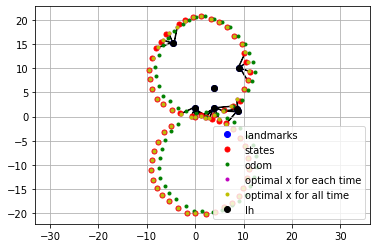

In [16]:
import matplotlib.pyplot as plt
lh = np.concatenate(result.optimized_values['landmarks']).reshape([len(lm),2])
xh = np.concatenate(result.optimized_values['poses']).reshape([len(x),2])
print('lh:', lh)
print('xh:', xh)
fig = plt.figure(1)
plt.plot(lm[:, 0], lm[:, 1], 'bo', label='landmarks')
plt.plot(x[:, 0], x[:, 1], 'r.', label='states', markersize=10)
#plot odom
x_odom = np.array([0, 0], dtype=float)
x_odom_hist = [x_odom]
for odom_i in odom:
    x_odom = np.array(x_odom) + np.array(odom_i[:2])
    x_odom_hist.append(x_odom)
x_odom_hist = np.array(x_odom_hist)
plt.plot(x_odom_hist[:, 0], x_odom_hist[:, 1], 'g.', linewidth=3, label='odom')
# plot best estimate history from each time step
plt.plot(xh[:,0], xh[:,1], 'm.', linewidth=3, label='optimal x for each time')
# plot best estimate from the final time step
plt.plot(xh[:,0], xh[:,1], 'y.', linewidth=3, label='optimal x for all time')
# plot best estimate landmarks
plt.plot(lh[:, 0], lh[:, 1], 'ko', label='lh')
#plt.plot(hist['lh'][-1])
# plot measurements
for rng, bearing, xi, li in z:
    xi = int(xi)
    x = xh[xi, :]
    plt.arrow(x[0], x[1], rng*np.cos(bearing) , rng*np.sin(bearing), width=0.1,
                  length_includes_head=True)
# # plot measurements
# for rng, bearing, xi in hist['z']:
#     xi = int(xi)
#     x = x_odom_hist[xi, :]
#     plt.arrow(x[0], x[1], rng*np.cos(bearing) , rng*np.sin(bearing), width=0.1,
#                   length_includes_head=True)
# plt.axis([0, 10, 0, 10])
plt.axis([5, 10, 0, 2])
plt.grid()
plt.legend()
plt.axis('equal');

In [ ]:
# data from sim
odom = sim['hist']['odom']
l = sim['landmarks']
z = sim['hist']['z']
hist = sim['hist']

# initialize x guess from odom
x0 = sim['hist']['x']
# print(x0[:,0].shape)
x1 = x0[:,0]
x2 = x0[:,1]
l1 = l[:,0]
l2 = l[:,1]
x0_new = np.hstack([x1, x2, l1, l2])
n_x = len(hist['x'])
x0_all = np.zeros([n_x+1,2])
x0_all[1: :] = x0

# compute data associations
assoc = [ slam2d.data_association(x0_all[int(xi), :], np.array([rng, bearing]), l) for rng, bearing, xi in z ]
print(assoc)

# build cost
f_J, J = slam2d.build_cost(odom, z, assoc, x0.shape[0], l.shape[0])

# compute cost , this is where we will send it to casadi nonlinear optim
f_J(x0, l)

# Symbols/expressions
nlp = {}                 # NLP declaration
nlp['x']= ca.vertcat(f_J.sx_in()[0][:,0], f_J.sx_in()[0][:,1], f_J.sx_in()[1][:,0], f_J.sx_in()[1][:,1]) # decision vars
nlp['f'] = J           # objective
nlp['g'] = 0             # constraints

# Create solver instance
F = ca.nlpsol('F','ipopt',nlp);

# Solve the problem using a guess
# This uses original landmark/measure association (associates which landmark we think the measurement is measuring)
optim = F(x0=x0_new)

# Re-associate landmark/measurements given new xstar positions
hist = sim['hist']
n_x = len(hist['x'])
n_l = len(sim['landmarks'])
xstar = np.reshape(optim['x'][0:2*n_x], [n_x,2], order='F')
lstar = np.reshape(optim['x'][2*n_x:None], [n_l,2], order='F')
x_allstar = np.zeros([n_x+1,2])
x_allstar[1: :] = xstar

zstar = []
for i in range(n_x):
    x = x_allstar[i,:]
    
    # measure landmarks
    z_list = slam2d.measure_landmarks(x, lstar, noise=noise)

    for z in z_list:
        zstar.append(np.hstack([z, i]))

zstar = np.array(zstar)


new_assoc = [ slam2d.data_association(x_allstar[int(xi), :], np.array([rng, bearing]), lstar) for rng, bearing, xi in zstar ]
print(type(new_assoc))

# # Loop through optimization and reassociation until the new association matches the old association.
# while new_assoc != assoc:
#     # build cost
#     f_J, J = slam2d.build_cost(odom, z, new_assoc, xstar.shape[0], lstar.shape[0])

#     # compute cost , this is where we will send it to casadi nonlinear optim
#     f_J(xstar, l)

#     # Symbols/expressions
#     nlp = {}                 # NLP declaration
#     nlp['x']= ca.vertcat(f_J.sx_in()[0][:,0], f_J.sx_in()[0][:,1], f_J.sx_in()[1][:,0], f_J.sx_in()[1][:,1]) # decision vars
#     nlp['f'] = J           # objective
#     nlp['g'] = 0             # constraints

#     # Create solver instance
#     F = ca.nlpsol('F','ipopt',nlp);

#     # Solve the problem using a guess
#     # This uses original landmark/measure association (associates which landmark we think the measurement is measuring)
#     xstar1 = xstar[:,0]
#     xstar2 = xstar[:,1]
#     lstar1 = l[:,0]
#     lstar2 = l[:,1]
#     xstar_new = np.hstack([xstar1, xstar2, lstar1, lstar2])
#     optim = F(x0=xstar_new)

#     # Re-associate landmark/measurements given new xstar positions
#     hist = sim['hist']
#     n_x = len(hist['x'])
#     n_l = len(sim['landmarks'])
#     xstar = np.reshape(optim['x'][0:2*n_x], [n_x,2], order='F')
#     lstar = np.reshape(optim['x'][2*n_x:None], [n_l,2], order='F')
#     x_allstar = np.zeros([n_x+1,2])
#     x_allstar[1: :] = xstar

#     zstar = []
#     for i in range(n_x):
#         x = x_allstar[i,:]

#         # measure landmarks
#         z_list = slam2d.measure_landmarks(x, lstar, noise=noise)

#         for z in z_list:
#             zstar.append(np.hstack([z, i]))

#     zstar = np.array(zstar)


#     new_assoc = [ slam2d.data_association(x_allstar[int(xi), :], np.array([rng, bearing]), lstar) for rng, bearing, xi in zstar ]


In [7]:
hist = sim['hist']
n_x = len(hist['x'])
n_l = len(sim['landmarks'])
xstar = np.zeros([n_x+1,2])
xstar[1: :] = np.reshape(optim['x'][0:2*n_x], [n_x,2], order='F')
lstar = np.reshape(optim['x'][2*n_x:None], [n_l,2], order='F')
print(optim['f'])
plt.figure(figsize=(10, 5))
slam2d.plot_me(sim)
for rng, bearing, xi in hist['z']:
    xi = int(xi)
    x = xstar[xi, :]
    # plt.arrow(x[0], x[1], rng*np.cos(bearing) , rng*np.sin(bearing), width=0.1,
    #               length_includes_head=True)
plt.plot(xstar[:, 0], xstar[:, 1], 'm.', linewidth=3, label='xstar')
plt.plot(lstar[:, 0], lstar[:, 1], 'ko', label='lstar')
plt.legend()

KeyError: 'landmarks'

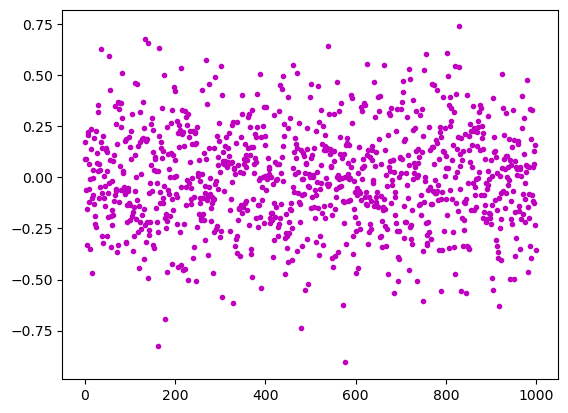

In [8]:
for lcv in range(1000):
    x = np.random.uniform(-1, 1)
    x_norm = (np.random.randn() + 0) / (4) * 1
    x2 = np.random.randn()
    # plt.plot(lcv,x,'r.')
    # plt.plot(lcv,x2,'k.')
    plt.plot(lcv,x_norm,'m.')

In [6]:
ca.__version__

'3.5.5'